<a href="https://colab.research.google.com/github/pawansai211/Data_Science/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df= pd.read_csv('/content/train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


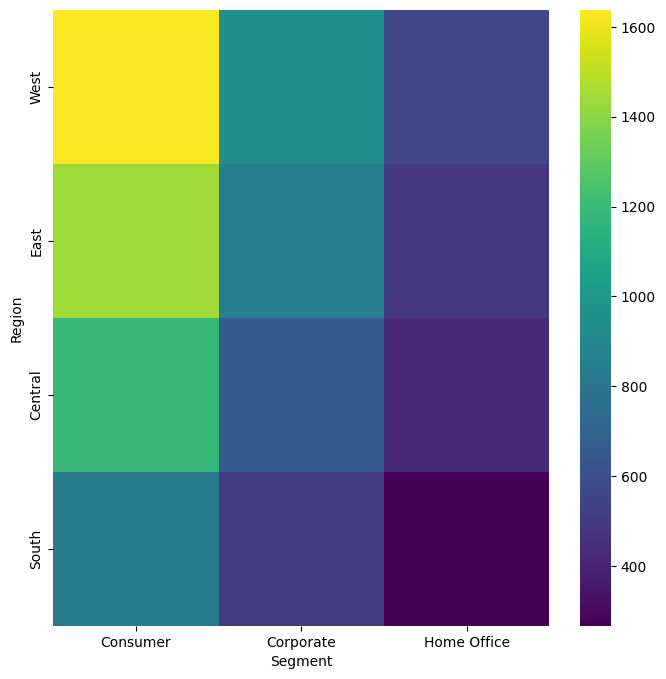

In [27]:
# @title Segment vs Region

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Region'].value_counts()
    for x_label, grp in df.groupby('Segment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Segment')
_ = plt.ylabel('Region')

In [4]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [2]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [3]:
df.duplicated().sum()

0

In [10]:
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)
df['Postal Code'].isnull().sum()

<ipython-input-10-edb639505ebb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)


0

In [11]:
df['Postal Code'].isnull().sum()

0

In [18]:
# Convert data types with flexible date parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True, errors='coerce')


<ipython-input-18-259cb6e18e71>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-18-259cb6e18e71>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True, errors='coerce')


In [19]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Order Weekday
0,1,CA-2017-152156,NaT,NaT,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,NaN,NaN,NaN,NaN
1,2,CA-2017-152156,NaT,NaT,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN,NaN,NaN,NaN
2,3,CA-2017-138688,NaT,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,NaN,NaN,NaN,NaN
3,4,US-2016-108966,NaT,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,NaN,NaN,NaN,NaN
4,5,US-2016-108966,NaT,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,NaT,NaT,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,NaN,NaN,NaN,NaN
9796,9797,CA-2016-128608,NaT,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,NaN,NaN,NaN,NaN
9797,9798,CA-2016-128608,NaT,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,NaN,NaN,NaN,NaN
9798,9799,CA-2016-128608,NaT,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,NaN,NaN,NaN,NaN


In [20]:
df['Order Date']

,Order Date
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
...,...
9795,NaT
9796,NaT
9797,NaT
9798,NaT


In [21]:
# prompt: REPLACE AND FILL  THE NAT VALUE FOR ORDER DATE AND SHIP DATE

import pandas as pd

df= pd.read_csv('/content/train.csv')

# Convert data types with flexible date parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True, errors='coerce')

# Fill NaN values in 'Order Date' and 'Ship Date' with the mode
df['Order Date'].fillna(df['Order Date'].mode()[0], inplace=True)
df['Ship Date'].fillna(df['Ship Date'].mode()[0], inplace=True)


<ipython-input-21-d151c4615789>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-21-d151c4615789>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-21-d151c4615789>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. Th

In [22]:
df['Order Date']

,Order Date
0,2017-08-11
1,2017-08-11
2,2017-12-06
3,2016-11-10
4,2016-11-10
...,...
9795,2017-05-09
9796,2016-12-01
9797,2016-12-01
9798,2016-12-01


In [23]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.weekday

In [25]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping Duration']

,Shipping Duration
0,92
1,92
2,188
3,579
4,579
...,...
9795,399
9796,558
9797,558
9798,558


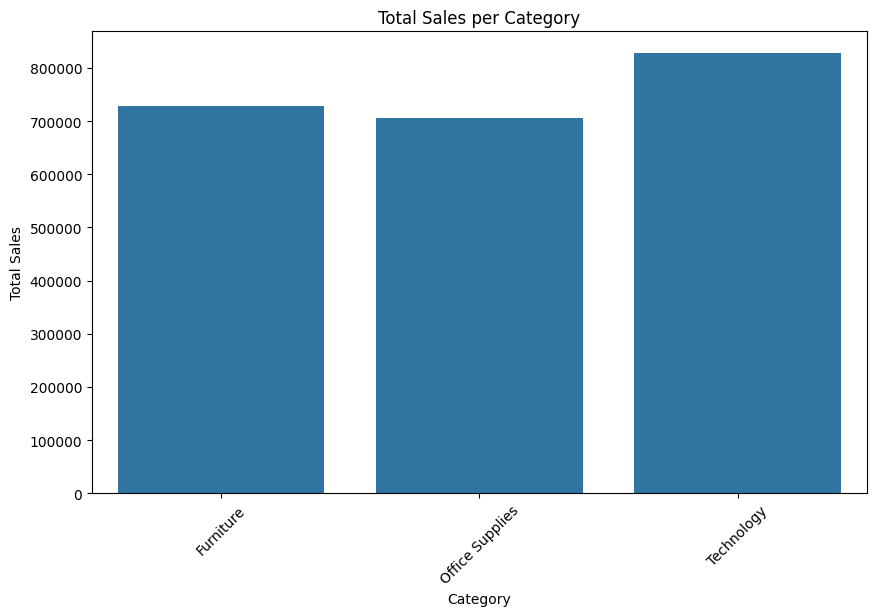

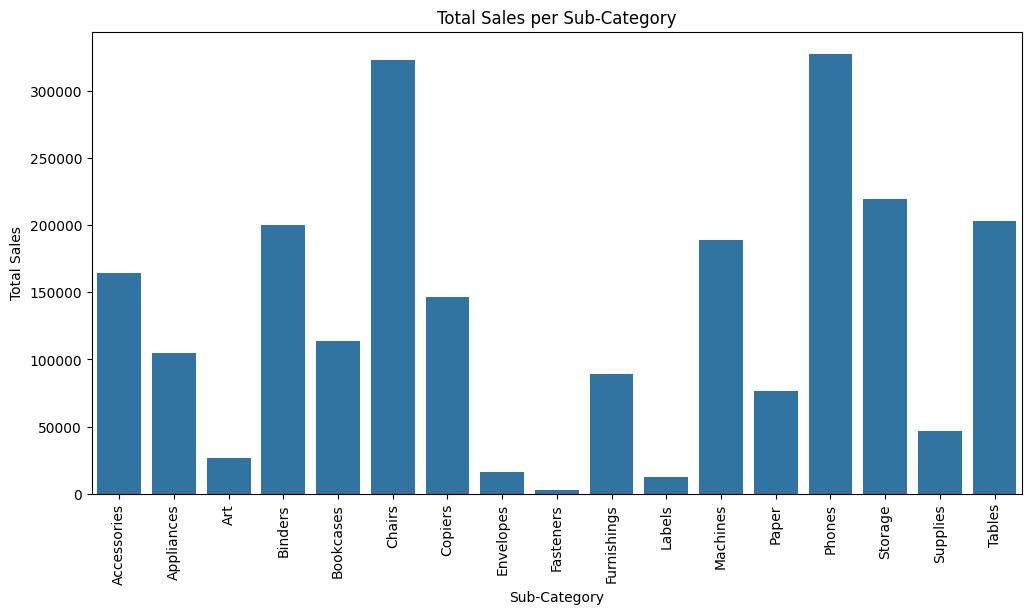

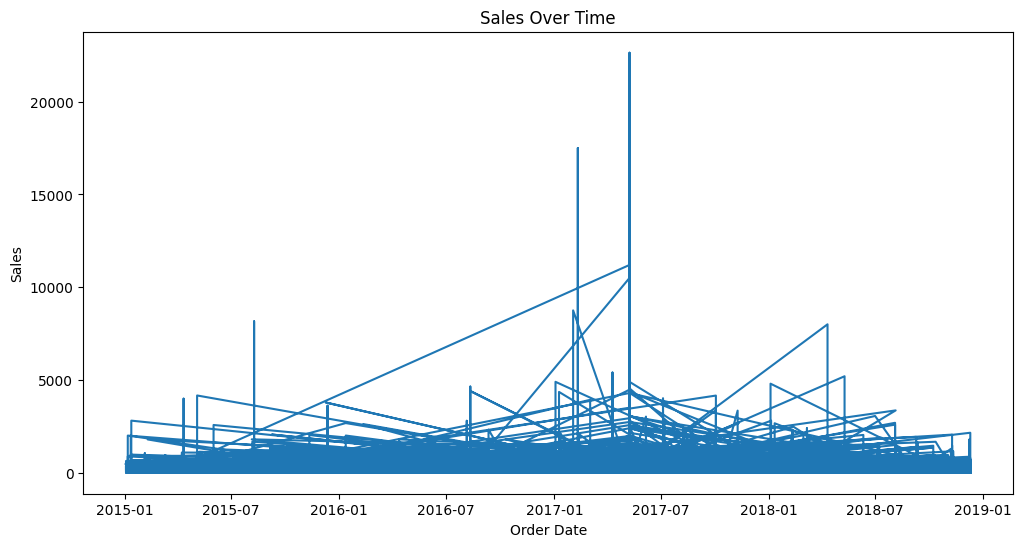

ValueError: Could not interpret value `Profit` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [26]:
# prompt: graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum()

# Create a bar plot of category sales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Category')
plt.xticks(rotation=45)
plt.show()


# Calculate the total sales for each sub-category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum()

# Create a bar plot of sub-category sales
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Sub-Category')
plt.xticks(rotation=90)
plt.show()


# Create a line plot of sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['Order Date'], df['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()


# Create a scatter plot of sales vs. profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')
plt.show()


# Create a histogram of sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


# Create a box plot of sales by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales Distribution by Category')
plt.show()

# Create a heatmap of correlation between numerical features
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Duration']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


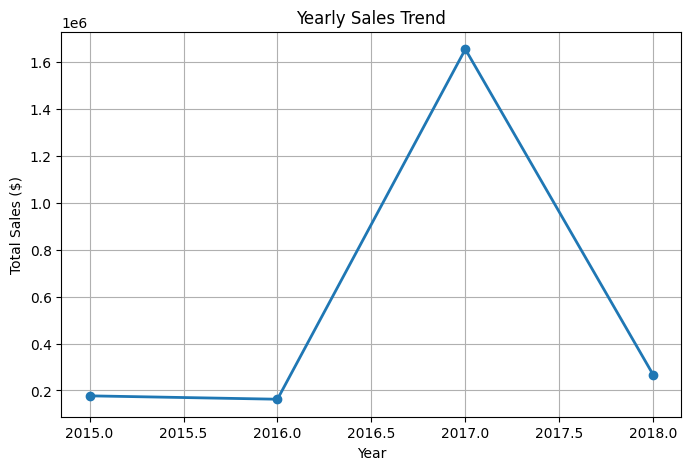

In [28]:
yearly_sales = df.groupby("Order Year")["Sales"].sum()

plt.figure(figsize=(8, 5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.title("Yearly Sales Trend")
plt.grid(True)
plt.show()

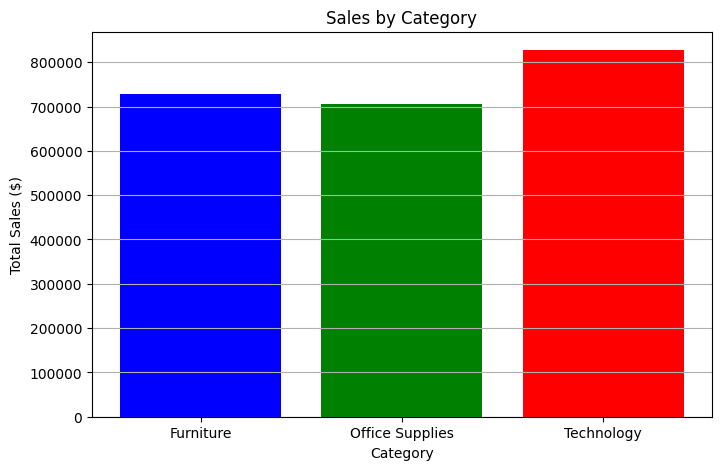

In [29]:
category_sales = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(8, 5))
plt.bar(category_sales.index, category_sales.values, color=['blue', 'green', 'red'])
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.title("Sales by Category")
plt.grid(axis='y')
plt.show()


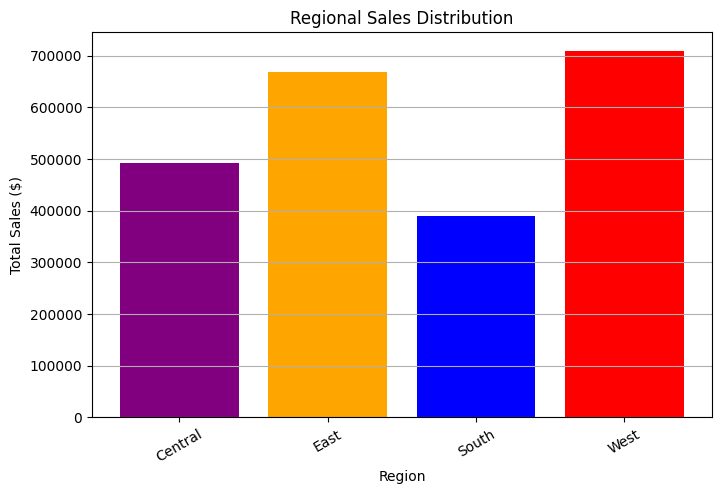

In [30]:
region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(8, 5))
plt.bar(region_sales.index, region_sales.values, color=['purple', 'orange', 'blue', 'red'])
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Regional Sales Distribution")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


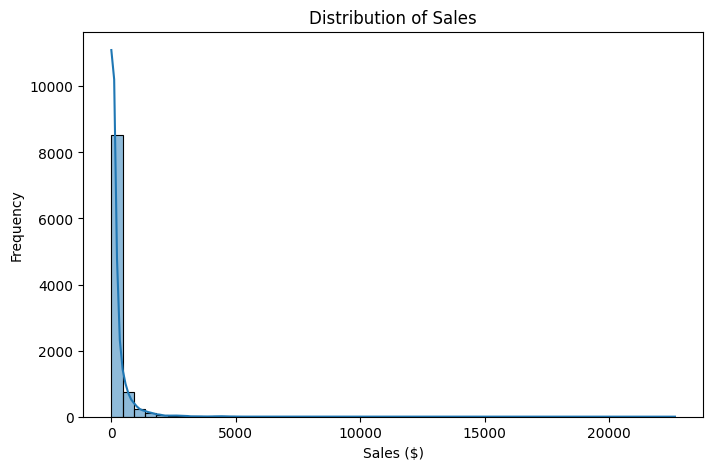

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.xlabel("Sales ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()


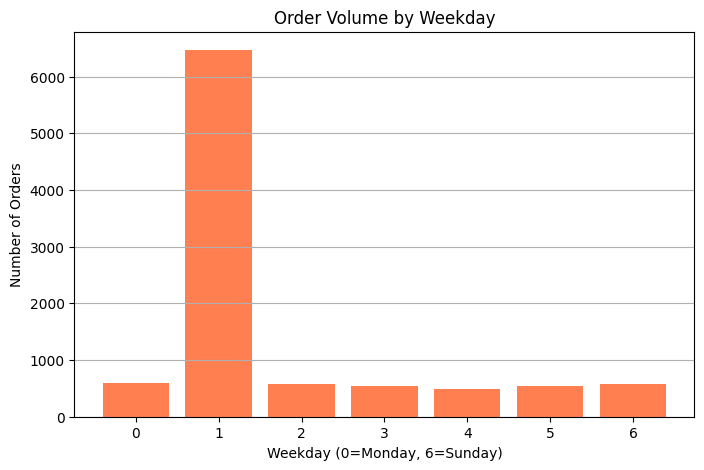

In [32]:
weekday_orders = df.groupby("Order Weekday")["Order ID"].count()
plt.figure(figsize=(8, 5))
plt.bar(weekday_orders.index, weekday_orders.values, color='coral')
plt.xlabel("Weekday (0=Monday, 6=Sunday)")
plt.ylabel("Number of Orders")
plt.title("Order Volume by Weekday")
plt.grid(axis='y')
plt.show()

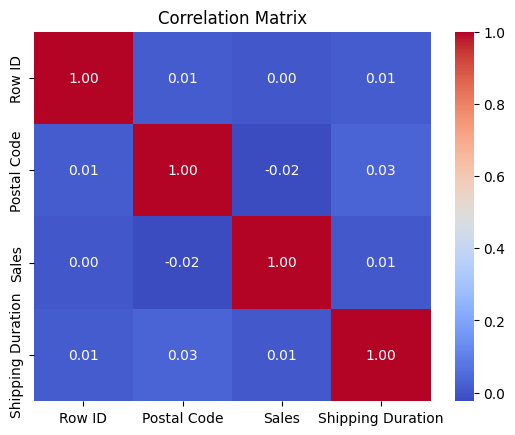

In [34]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])  #
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
